# `fractal_noise`

This function wraps the [pyfastnoisesimd](https://github.com/robbmcleod/PyFastNoiseSIMD) package. The PoreSpy wrapper offers a slightly simpler experience which is more consistent with the function-based approach found in PoreSpy, scikit-image, and scipy.ndimage. For full control over it's features you can just use it directly since it is installed with PoreSpy.

In [72]:
import matplotlib.pyplot as plt
import porespy as ps
ps.visualization.set_mpl_style()
np.random.seed(10)

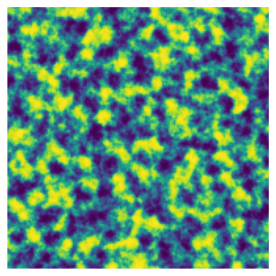

In [17]:
shape = [200, 200]
im = ps.generators.fractal_noise(shape=shape)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

## List of arguments and defaults

In [28]:
import inspect
a = inspect.getfullargspec(ps.generators.fractal_noise)
b = inspect.signature(ps.generators.fractal_noise)
print(b)

(shape, frequency=0.05, octaves=4, gain=0.5, mode='simplex', seed=None, cores=None, uniform=True)


## `cores`

The noise is generated by the ``pyfastnoisesimd`` package which supports multiple cores to really speed things up. By default we use all the available cores on the machine, however, occasionally this causes problems and kernel crashes. Setting this argument to a value less than the maximum usually avoids these issues.  Here we'll use 1.  

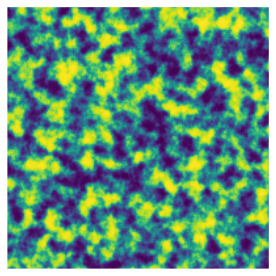

In [18]:
cores = 1
im = ps.generators.fractal_noise(shape=shape, cores=cores)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

## `seed`
In order to produce the same image twice it's possible send a seed value to the function.  Unfortunately the ``numpy.random.seed`` function is not recognized:

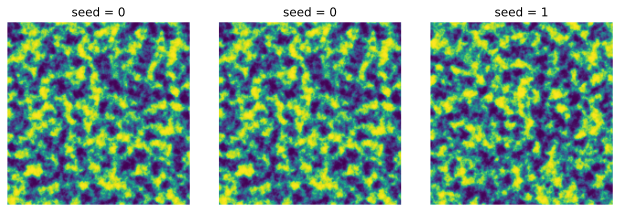

In [30]:
seed = 0
im1 = ps.generators.fractal_noise(shape=shape, seed=seed, cores=cores)
im2 = ps.generators.fractal_noise(shape=shape, seed=seed, cores=cores)
seed = 1
im3 = ps.generators.fractal_noise(shape=shape, seed=seed, cores=cores)
fig, ax = plt.subplots(1, 3, figsize=[9, 3])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[2].imshow(im3, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
ax[0].set_title('seed = 0')
ax[1].set_title('seed = 0')
ax[2].set_title('seed = 1');

## ``frequency``

This controls the size of the blobs relative to the image size, with larger values giving smaller features:

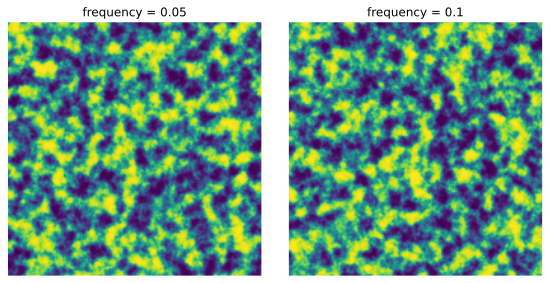

In [59]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

frequency = 0.1
im1 = ps.generators.fractal_noise(shape=shape, frequency=frequency, cores=cores, seed=seed)
ax[0].imshow(im)
ax[0].axis(False)
ax[0].set_title(f'frequency = 0.05')

frequency = 0.05
im2 = ps.generators.fractal_noise(shape=shape, frequency=frequency, cores=cores, seed=seed)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'frequency = 0.1');

## `octaves`
The numbers of octaves controls the levels of noise that get overlaid to create the realistic texture

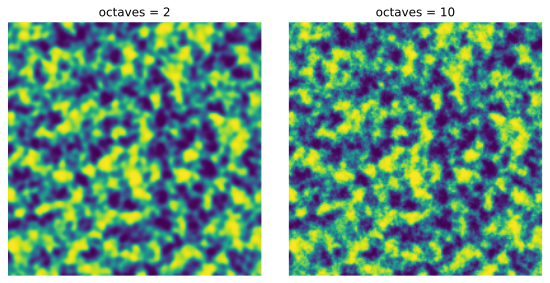

In [60]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

octaves=2
im1 = ps.generators.fractal_noise(shape=shape, octaves=octaves, frequency=frequency, seed=seed, cores=cores)
ax[0].imshow(im1)
ax[0].axis(False)
ax[0].set_title(f'octaves = {octaves}')

octaves=10
im2 = ps.generators.fractal_noise(shape=shape, octaves=octaves, frequency=frequency, seed=seed, cores=cores)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'octaves = {octaves}');

## `gain`
This controls the intensity of each added layer of noise:

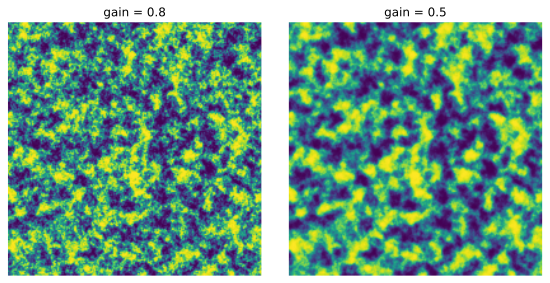

In [61]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

gain = 0.8
im1 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores)
ax[0].imshow(im1)
ax[0].axis(False)
ax[0].set_title(f'gain = {gain}')

gain = 0.5
im2 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'gain = {gain}');

##  `mode`

The ``pyfastnoisesimd`` package provides 4 different methods for computing noise, which we expose via the ``mode`` argument:

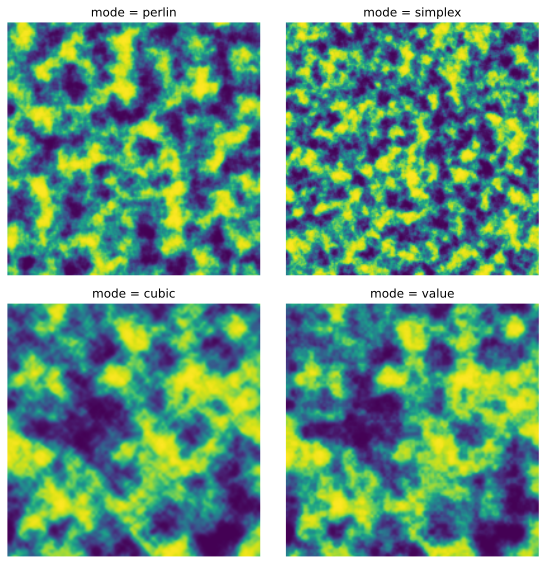

In [63]:
fig, ax = plt.subplots(2, 2, figsize=[8, 8])

mode='perlin'
im1 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode)
ax[0][0].imshow(im1)
ax[0][0].axis(False)
ax[0][0].set_title(f'mode = {mode}')

mode = 'simplex'
im2 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode)
ax[0][1].imshow(im2)
ax[0][1].axis(False)
ax[0][1].set_title(f'mode = {mode}')

mode = 'cubic'
im2 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode)
ax[1][0].imshow(im2)
ax[1][0].axis(False)
ax[1][0].set_title(f'mode = {mode}')

mode = 'value'
im2 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode)
ax[1][1].imshow(im2)
ax[1][1].axis(False)
ax[1][1].set_title(f'mode = {mode}');

## `uniform`
Controls whether the returned noise values are scaled to a uniform distribution, which is useful for thresholding to create a specific porosity, or if the original distribution is returned

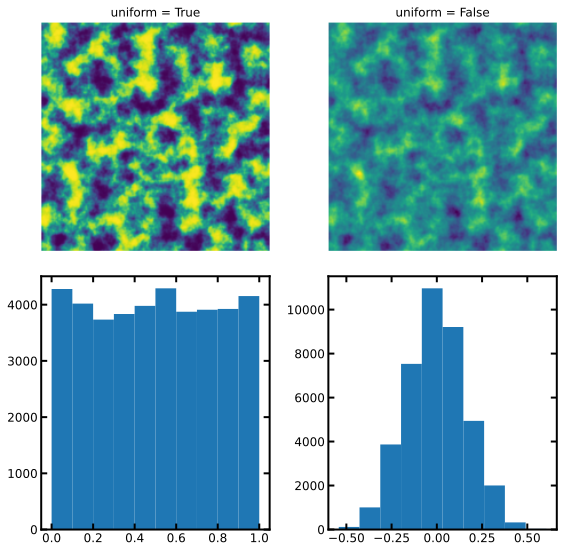

In [67]:
fig, ax = plt.subplots(2, 2, figsize=[8, 8])

mode='perlin'
uniform=True
im1 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode, uniform=uniform)
ax[0][0].imshow(im1)
ax[0][0].axis(False)
ax[0][0].set_title(f'uniform = {uniform}')

uniform=False
im2 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode, uniform=uniform)
ax[0][1].imshow(im2)
ax[0][1].axis(False)
ax[0][1].set_title(f'uniform = {uniform}')

ax[1][0].hist(im1.flatten())
ax[1][1].hist(im2.flatten());

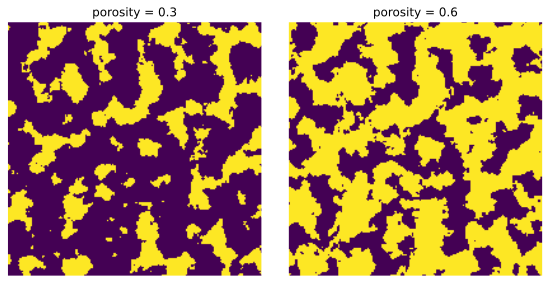

In [71]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

uniform=True
im1 = ps.generators.fractal_noise(shape=shape, gain=gain, seed=seed, cores=cores, mode=mode, uniform=uniform)

porosity=0.3
ax[0].imshow(im1 < porosity)
ax[0].axis(False)
ax[0].set_title(f'porosity = {porosity}')

porosity=0.6
ax[1].imshow(im1 < porosity)
ax[1].axis(False)
ax[1].set_title(f'porosity = {porosity}');